In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
import acquire
from acquire import get_telco_data
from prepare import prep_telco
from prepare import telco_split
from env import host, user, password
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
##Import data set pre-prep to examine the data and get familiar with it.

In [3]:
df = get_telco_data()

In [4]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,1,Yes,4,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,1,Yes,1,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,No,1,Yes,1,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,No,1,No,3,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [5]:
##Look at summary statistics for numerical columns

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
##Plot some of the categorical variables looking for preliminary relationships

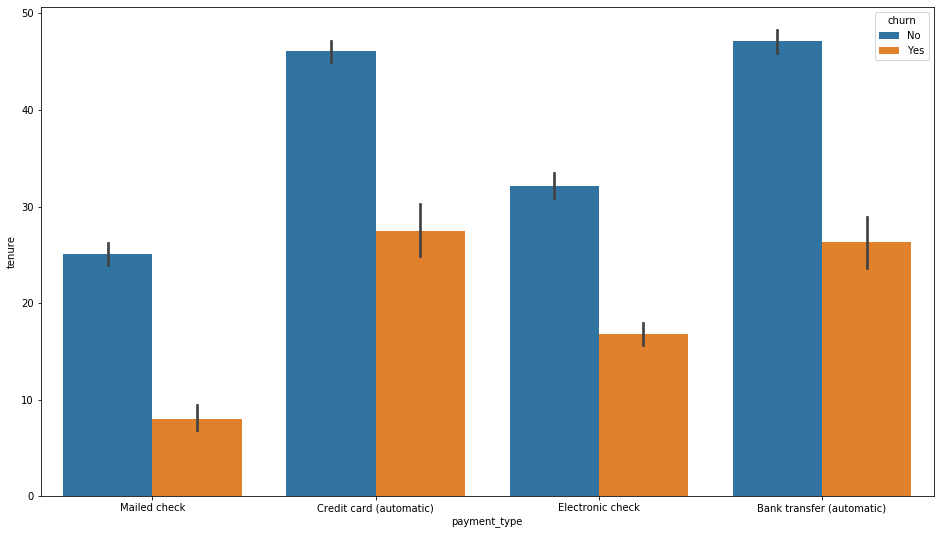

In [8]:
plt.rc('figure',figsize=(16,9))

sns.barplot(x='payment_type', y='tenure', hue='churn', data=df)

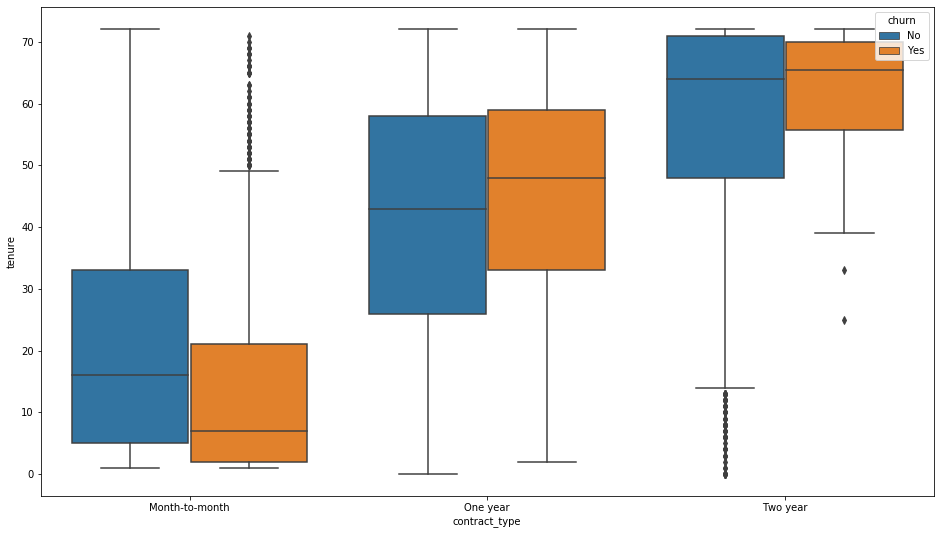

In [9]:
plt.rc('figure',figsize=(16,9))

sns.boxplot(x='contract_type', y='tenure', hue='churn', data=df)

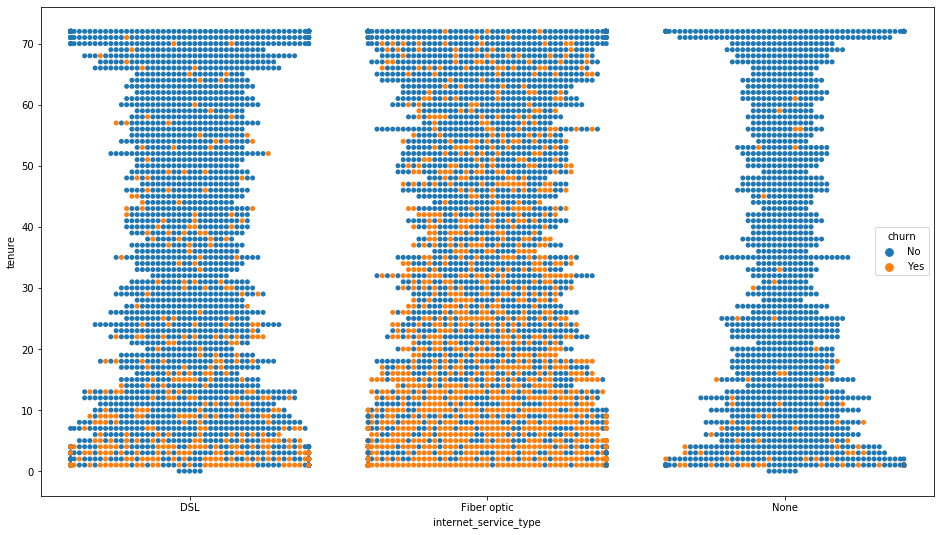

In [10]:
plt.rc('figure',figsize=(16,9))

sns.swarmplot(x='internet_service_type', y='tenure', hue='churn', data=df)

In [11]:
##Check for any null values

In [12]:
df.isnull().sum()

customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
internet_service_type_id    0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
contract_type_id            0
paperless_billing           0
payment_type_id             0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [13]:
##Hypothesis Testing

Null Hypothesis: There is no significant relationship between churn and type of payment method

In [14]:
observed = pd.crosstab(df.churn, df.payment_type)
observed

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


In [15]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(p)
print(p < .05)

3.6823546520097993e-140
True


We reject the null hypothesis that there is no significant relationship between payment type and churn

-----------------------------------------------------------------------

In [16]:
##Pull in our prepped data set

In [17]:
df = prep_telco()

In [18]:
df.head()

,senior_citizen,tenure,phone_service,paperless_billing,monthly_charges,churn,Month-to-month,One year,Two year,DSL,Fiber optic,None,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Female,Male
0,0,9,1,0,59.9,0,1,0,0,1,0,0,0,0,0,1,0,1
1,0,9,1,1,69.4,0,1,0,0,1,0,0,0,1,0,0,1,0
2,1,7,1,1,48.2,0,1,0,0,1,0,0,0,0,1,0,1,0
3,1,1,0,1,25.1,1,1,0,0,1,0,0,0,0,1,0,0,1
4,0,1,0,0,30.5,1,1,0,0,1,0,0,1,0,0,0,1,0


In [19]:
##Split our data for modeling

In [20]:
train, validate, test = telco_split(df)

In [21]:
##Ensure the data is correctly split

In [22]:
print(train.shape)
print(validate.shape)
print(test.shape)

(3943, 18)
(1691, 18)
(1409, 18)


In [23]:
##Take a quick look to make sure data is 

In [24]:
train.head()

,senior_citizen,tenure,phone_service,paperless_billing,monthly_charges,churn,Month-to-month,One year,Two year,DSL,Fiber optic,None,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Female,Male
5670,0,5,1,0,20.35,0,1,0,0,0,0,1,0,1,0,0,0,1
4152,0,6,1,1,89.25,0,1,0,0,0,1,0,0,0,1,0,1,0
4890,0,54,1,0,84.40,0,0,1,0,0,1,0,0,0,1,0,0,1
2391,0,72,1,0,64.75,0,0,0,1,1,0,0,1,0,0,0,1,0
2896,0,28,1,0,76.55,0,1,0,0,0,1,0,1,0,0,0,0,1


In [25]:
##Check our baseline model for churn

In [26]:
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [27]:
total = 2897 / (1046 + 2897)
print(f'Our baseline model is {total:.2%}')

Our baseline model is 73.47%


In [28]:
##Build our first model with a Logistic Regression, evaluating all the independent variables to find their coefficient. 

In [29]:
logit = LogisticRegression()


In [30]:
X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [31]:
logit = logit.fit(X_train, y_train)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

In [33]:
logit.score(X_train, y_train)


0.8001521683996957

In [35]:
print(logit.coef_)
print(X_train.columns)


[[ 0.1469971  -0.03480605 -0.79458373  0.39560951  0.01047071  0.60478486
  -0.02170918 -1.03169191 -0.36322252  0.54330592 -0.62869962 -0.14365406
  -0.23866299  0.15270431 -0.21900348 -0.21443408 -0.23418214]]
Index(['senior_citizen', 'tenure', 'phone_service', 'paperless_billing',
       'monthly_charges', 'Month-to-month', 'One year', 'Two year', 'DSL',
       'Fiber optic', 'None', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'Mailed check', 'Female',
       'Male'],
      dtype='object')


Strong correlations seem to exist with phone service, M2M, Two Year, and Fiber Optic. At this point I am still going to explore the relationship with payment method and churn.

-------------------------------------------------------------------------

In [37]:
X_train2 = train[['phone_service', 'Month-to-month', 'One year', 'Two year']]
y_train = train.churn

In [38]:
logit2 = LogisticRegression()
logit2 = logit2.fit(X_train2, y_train)

print(logit2.coef_)
print(X_train2.columns)

[[ 0.06795031  1.6236104  -0.02360575 -1.60071497]]
Index(['phone_service', 'Month-to-month', 'One year', 'Two year'], dtype='object')


In [39]:
logit2.score(X_train2, y_train)


0.7347197565305605

In [40]:
X_train3 = train[['Bank transfer (automatic)', 'Electronic check', 'Credit card (automatic)', 'Mailed check']]
y_train = train.churn

In [41]:
logit3 = LogisticRegression()
logit3 = logit3.fit(X_train3, y_train)

print(logit3.coef_)
print(X_train3.columns)

[[-0.25060524  0.98739834 -0.49534751 -0.24169387]]
Index(['Bank transfer (automatic)', 'Electronic check',
       'Credit card (automatic)', 'Mailed check'],
      dtype='object')


In [42]:
logit3.score(X_train3, y_train)


0.7347197565305605

Providing more independent variables gives us a better level of accuracy to predict churn, but from this second sample, we can see that paying with electronic check(non-automatic payment) provides a high correlation to churn.